In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline





## YACIMIENTOS MINERALES

In [6]:
pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/YacimientosMinerales.csv')



,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",...,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,"Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304627,Mackenzie District,6.00128,-58.16600,SA,Guyana,NaN,NaN,M,Aluminum,NaN,...,LATERITIC BAUXITE,L,Producer,NaN,NaN,NaN,"Montgomery Mine, Maria Elizabeth Mine",PRE-PLIOCENE PENEPLAIN,NaN,NaN
304628,Cuale District,20.38117,-105.10877,NaN,Mexico,Jalisco,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,...,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304629,Agalteca,14.44527,-87.29280,NaN,Honduras,NaN,NaN,M,Iron,NaN,...,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,NaN,"Group P, O, Q, C, B",NaN,NaN,NaN
304630,La Libertad Area,12.21347,-85.16665,NaN,Nicaragua,Chontales,NaN,NaN,Gold,Silver,...,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,NaN,"San Juan Mine, Babilonia Mine, Chamarro Prospe...",INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


In [7]:
df = pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/YacimientosMinerales.csv')
df.head()



,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",...,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,"Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,NaN,Mica Schist,NaN


In [8]:
df.head(20)


,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Lookout Prospect,55.05612,-132.14344,NaN,United States,Alaska,NaN,M,Copper,"Gold, Silver",...,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,"Conundrum, Mammoth, Wakefield Minerals Co.",NaN,Schist,NaN
1,Lucky Find Prospect,55.52751,-132.68514,NaN,United States,Alaska,NaN,M,Copper,Gold,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,NaN,Vein Follows Contact,Diabase,NaN
2,Mccullough Prospect,55.97751,-132.99906,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,"Claims: Horseshoe, Copper, Lake Bay",NaN,Siltstone,NaN
3,Lucky Jim Claim,55.52195,-132.68653,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,NaN,Granite,Granite
4,Matilda Occurrence,55.14556,-132.05233,NaN,United States,Alaska,NaN,M,Gold,NaN,...,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,NaN,Mica Schist,NaN
5,Marion Prospect,55.14695,-132.48512,NaN,United States,Alaska,NaN,M,Copper,NaN,...,NaN,N,Occurrence,"Chalcopyrite, Galena, Pyrite",NaN,Underground,Nutqua Gold Mining Co.,NaN,Schist,NaN
6,Marble Heart Prospect,55.32890,-132.76013,NaN,United States,Alaska,NaN,M,Lead,NaN,...,NaN,N,Occurrence,Galena,NaN,NaN,NaN,NaN,Limestone,NaN
7,Morning Star Prospect,55.56362,-132.45042,NaN,United States,Alaska,NaN,M,Gold,Copper,...,NaN,N,Occurrence,"Chalcopyrite, Magnetite, Pyrite",NaN,NaN,NaN,NaN,NaN,NaN
8,Monday Prospect,55.50529,-132.63237,NaN,United States,Alaska,NaN,M,Silver,Gold,...,Vein,N,Occurrence,"Galena, Pyrite","Quartz, Vesuvianite",NaN,NaN,NaN,Slate,Andesite
9,Miller Brothers Claim,55.22334,-132.63513,NaN,United States,Alaska,NaN,M,"Copper, Gold",NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail(20)


,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
304612,Birmingham Red Ore Mines District,33.46125,-86.85829,NaN,United States,Alabama,Jefferson,M,Iron,NaN,...,BEDDED,L,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304613,Transvaal - San Judas - El Molibdeno - La Verde,29.86689,-109.96734,NaN,Mexico,Sonora,NaN,M,"Molybdenum, Copper",NaN,...,NaN,Y,Producer,NaN,NaN,NaN,Cumobabi,NaN,NaN,NaN
304614,Milluni District,-16.27270,-68.11621,SA,Bolivia,La Paz,NaN,M,Tin,Bismuth,...,"STRATABOUND, STOCKWORK, VEIN",M,Past Producer,NaN,NaN,NaN,NaN,QUARTZITE BEDS SANDWICHED BETWEEN SHALE LAYERS...,NaN,NaN
304615,Chacarrilla District,-17.57266,-68.19951,SA,Bolivia,La Paz,NaN,NaN,Copper,NaN,...,STRATIFORM,M,Producer,NaN,NaN,NaN,"Amigo, Borda, Congreso, Esperanza, Eureka, Miz...","NW TRENDING FRACTURES, PREFERRED BEDDING, FLAN...",NaN,NaN
304616,Douglas Creek Placer Mining District,41.20830,-106.26110,NaN,United States,Wyoming,Albany,M,Gold,NaN,...,STREAM PLACER,S,Past Producer,NaN,NaN,NaN,"Spring Creek Placers, Home Placers, Albany Pla...",STREAM HYDRAULICS,NaN,NaN
304617,Stateline (Gold Springs) District,37.41668,-113.80081,NaN,United States,Utah,Iron,M,"Lead, Silver, Gold",NaN,...,VEIN,NaN,Prospect,NaN,NaN,NaN,NaN,FAULTS,NaN,NaN
304618,Upper Mississippi Valley District,NaN,NaN,NaN,United States,Iowa,"Jackson, Clayton, Dubuque",M,"Iron, Lead, Zinc",NaN,...,MISSISSIPPI VALLEY-TYPE LEAD-ZINC,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304619,Guttenberg Subdistrict,42.80831,-91.12794,NaN,United States,Iowa,"Clayton, Jackson, Dubuque",M,Lead,NaN,...,MISSISSIPPI VALLEY-TYPE LEAD-ZINC,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304620,North Buena Vista Subdistrict,42.68501,-90.96623,NaN,United States,Iowa,"Jackson, Clayton, Dubuque",M,"Lead, Zinc",NaN,...,MISSISSIPPI VALLEY-TYPE LEAD-ZINC,Y,Past Producer,NaN,NaN,NaN,Turkey River Subdistrict,NaN,NaN,NaN
304621,Sherrill Mound Subdistrict,42.60421,-90.82183,NaN,United States,Iowa,"Clayton, Dubuque, Jackson",M,"Zinc, Lead",NaN,...,MISSISSIPPI VALLEY-TYPE LEAD ZINC,Y,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.sample(20)


,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
287957,Silver Glance Group,37.88665,-116.46809,NaN,United States,Nevada,Nye,M,Silver,NaN,...,NaN,NaN,Past Producer,NaN,NaN,NaN,Clifford Mine,NaN,NaN,NaN
103044,Wilson Group,45.05960,-115.41596,NaN,United States,Idaho,Valley,M,"Gold, Antimony",NaN,...,Vein,S,Past Producer,"Galena, Kermesite, Sphalerite, Stibiconite, St...","Pyrite, Quartz",Underground,NaN,Fractures,Diorite,Diorite
4967,El Borbollon,-34.59575,-68.60782,SA,Argentina,Mendoza,NaN,N,Clay,NaN,...,NaN,Y,Past Producer,NaN,NaN,Unknown,NaN,NaN,NaN,NaN
63580,La Blanca,-37.83252,-69.99529,SA,Argentina,Neuquen,NaN,N,Strontium,Barium-Barite,...,NaN,S,Producer,Celestite,NaN,NaN,Grupo La Cecilia,NaN,Evaporite,"Shale,Sandstone,Limestone"
134038,Sugarloaf Butte Alunite,33.63316,-114.31639,NaN,United States,Arizona,La Paz,M,Aluminum,NaN,...,NaN,NaN,Prospect,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140734,Upper Red River Placers,45.74987,-115.39657,NaN,United States,Idaho,Idaho,M,REE,NaN,...,NaN,NaN,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233494,Gravel Pit,38.72889,-108.00876,NaN,United States,Colorado,Delta,N,"Sand and Gravel, Construction",NaN,...,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293956,Acme Concrete Pit,47.76346,-117.35298,NaN,United States,Washington,Spokane,N,"Sand and Gravel, Construction",NaN,...,NaN,NaN,Past Producer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262722,Kelley Gulch,45.33910,-112.92589,NaN,United States,Montana,Beaverhead,N,Phosphorus-Phosphates,NaN,...,NaN,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210877,Unnamed Iron Deposit,34.11183,-84.76603,NaN,United States,Georgia,Bartow,M,Iron,NaN,...,NaN,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PAISES CON MAYOR CANTIDAD DE YACIMIENTOS

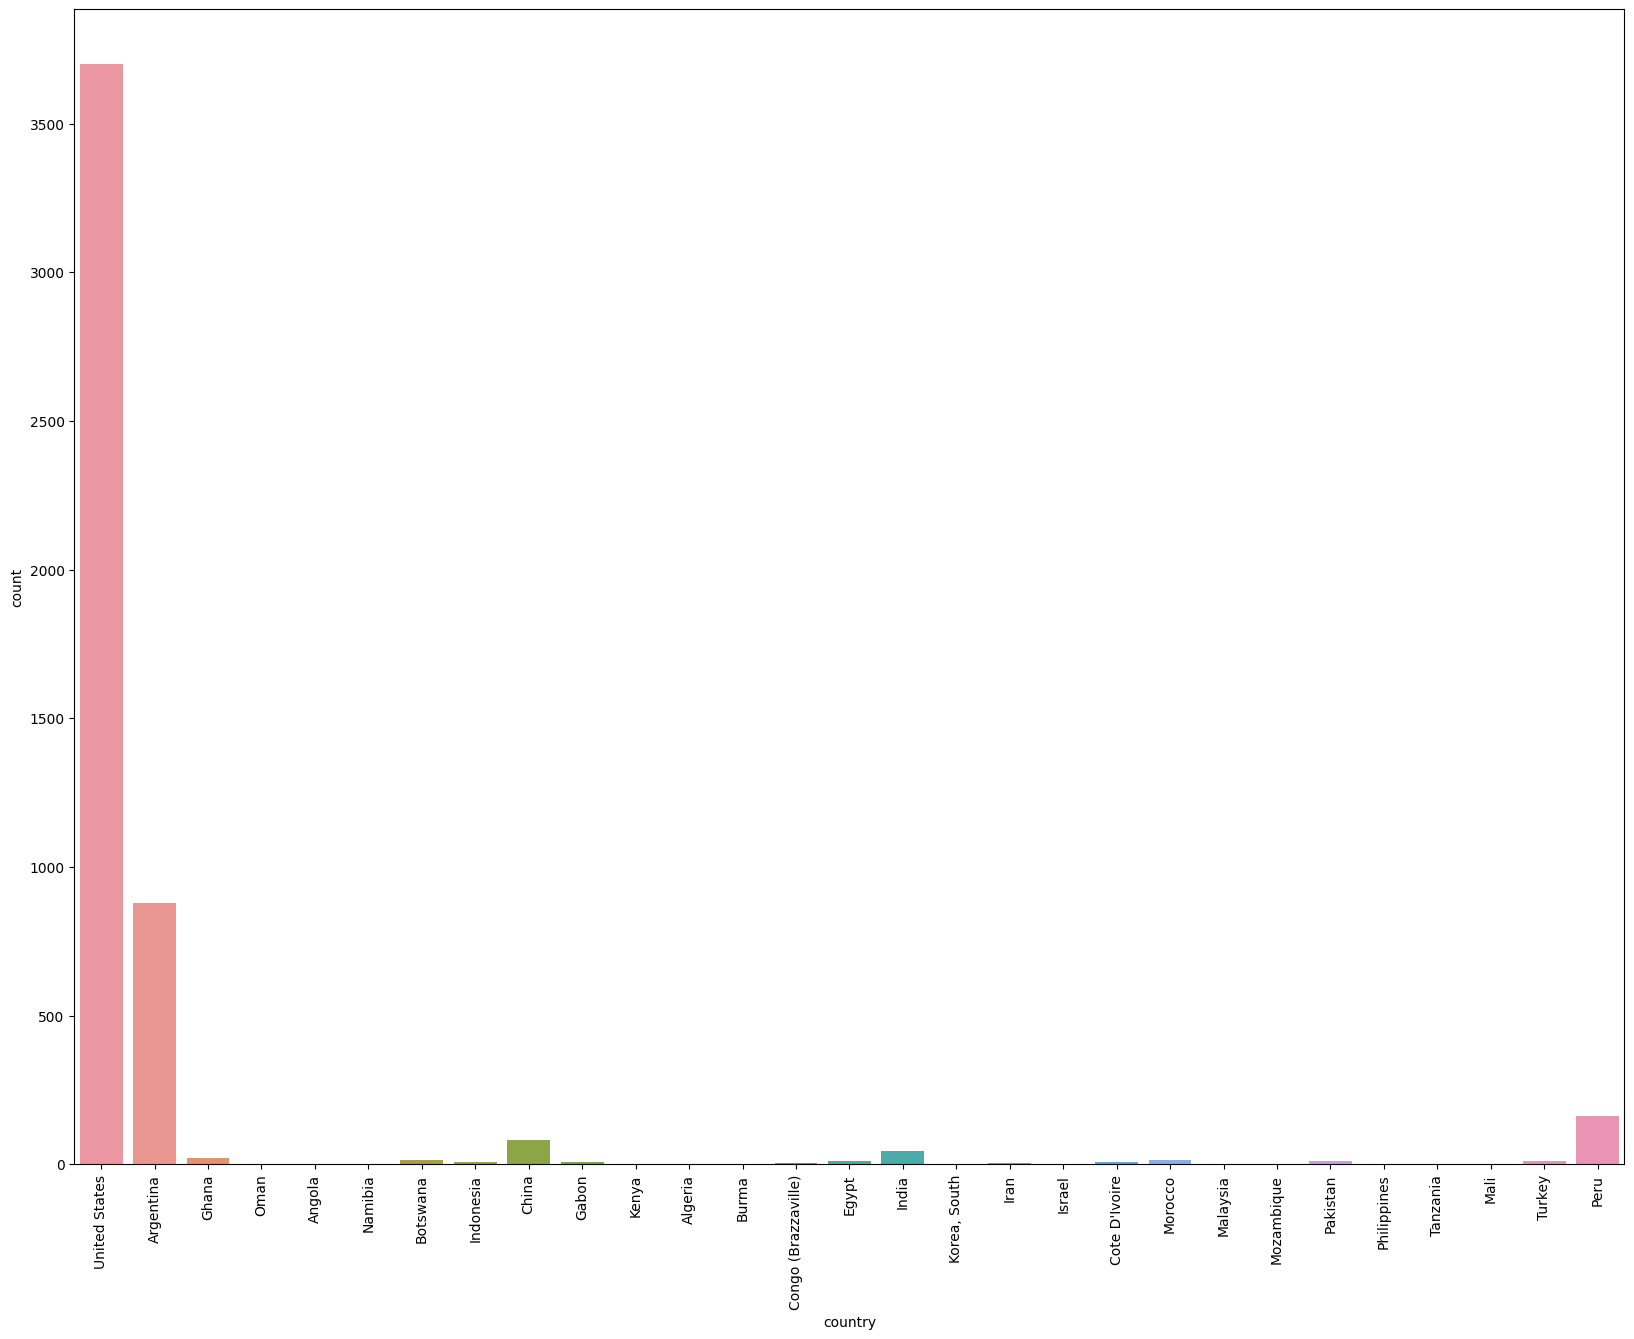

In [14]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['country'].head(5000))
plt.xticks(rotation=90)
plt.show()

## REGIONES CON MAYOR CANTIDAD DE YACIMIENTOS

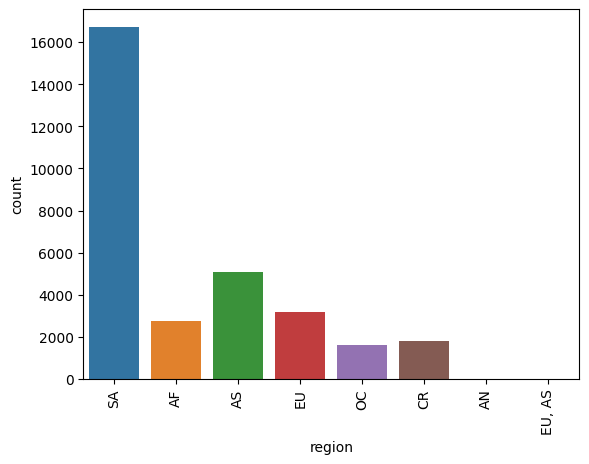

In [17]:
sns.countplot(x=df['region'])
plt.xticks(rotation=90)
plt.show()

## ESTADOS/PROVINCIAS CON MAYOR CANTIDAD DE YACIMIENTOS

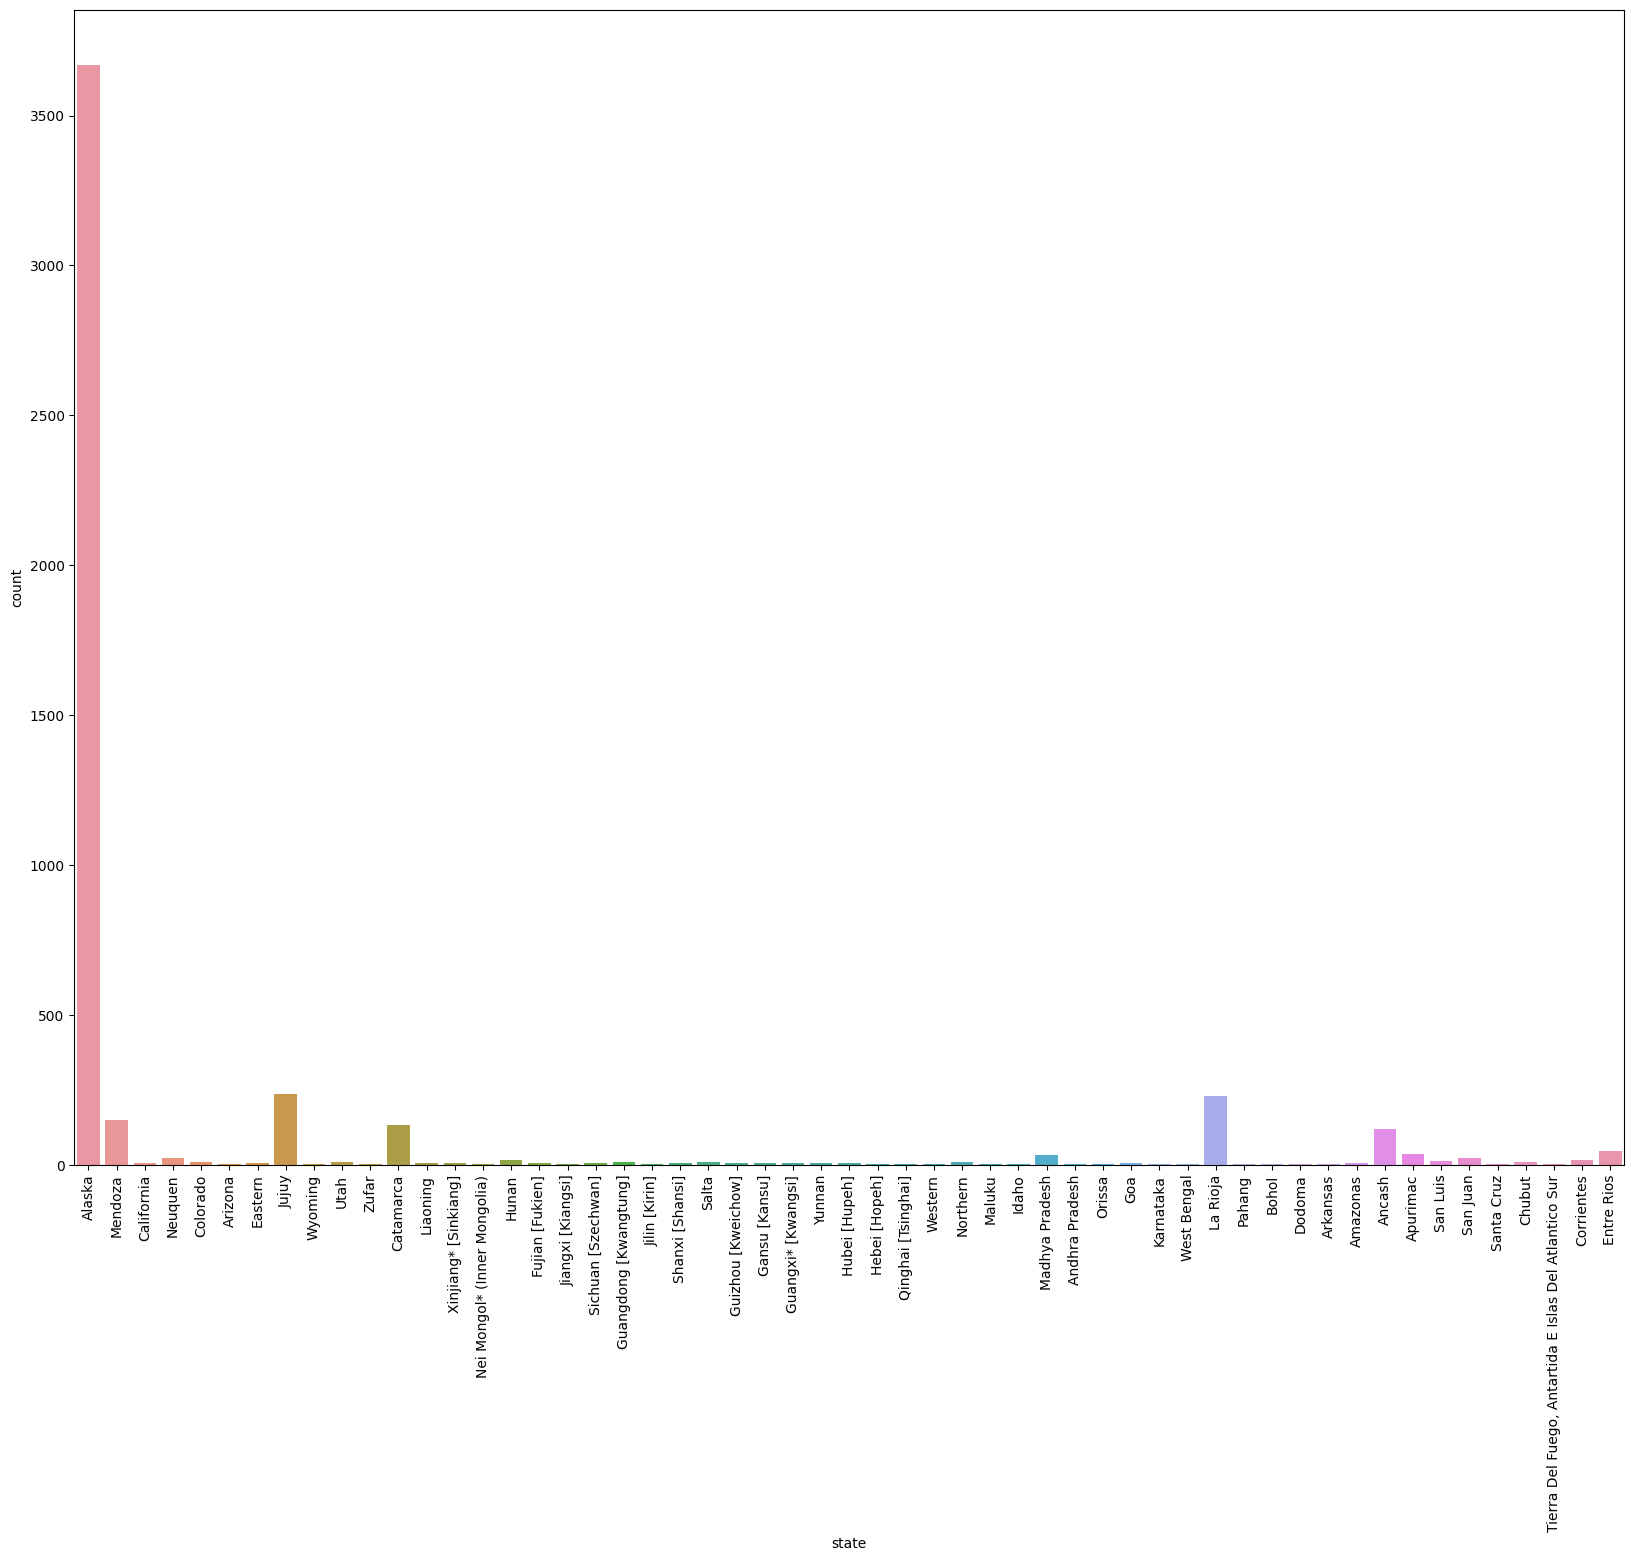

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['state'].head(5000))
plt.xticks(rotation=90)
plt.show()

## PRINCIPALES TIPOS DE COMMODITIES PRIMARIOS

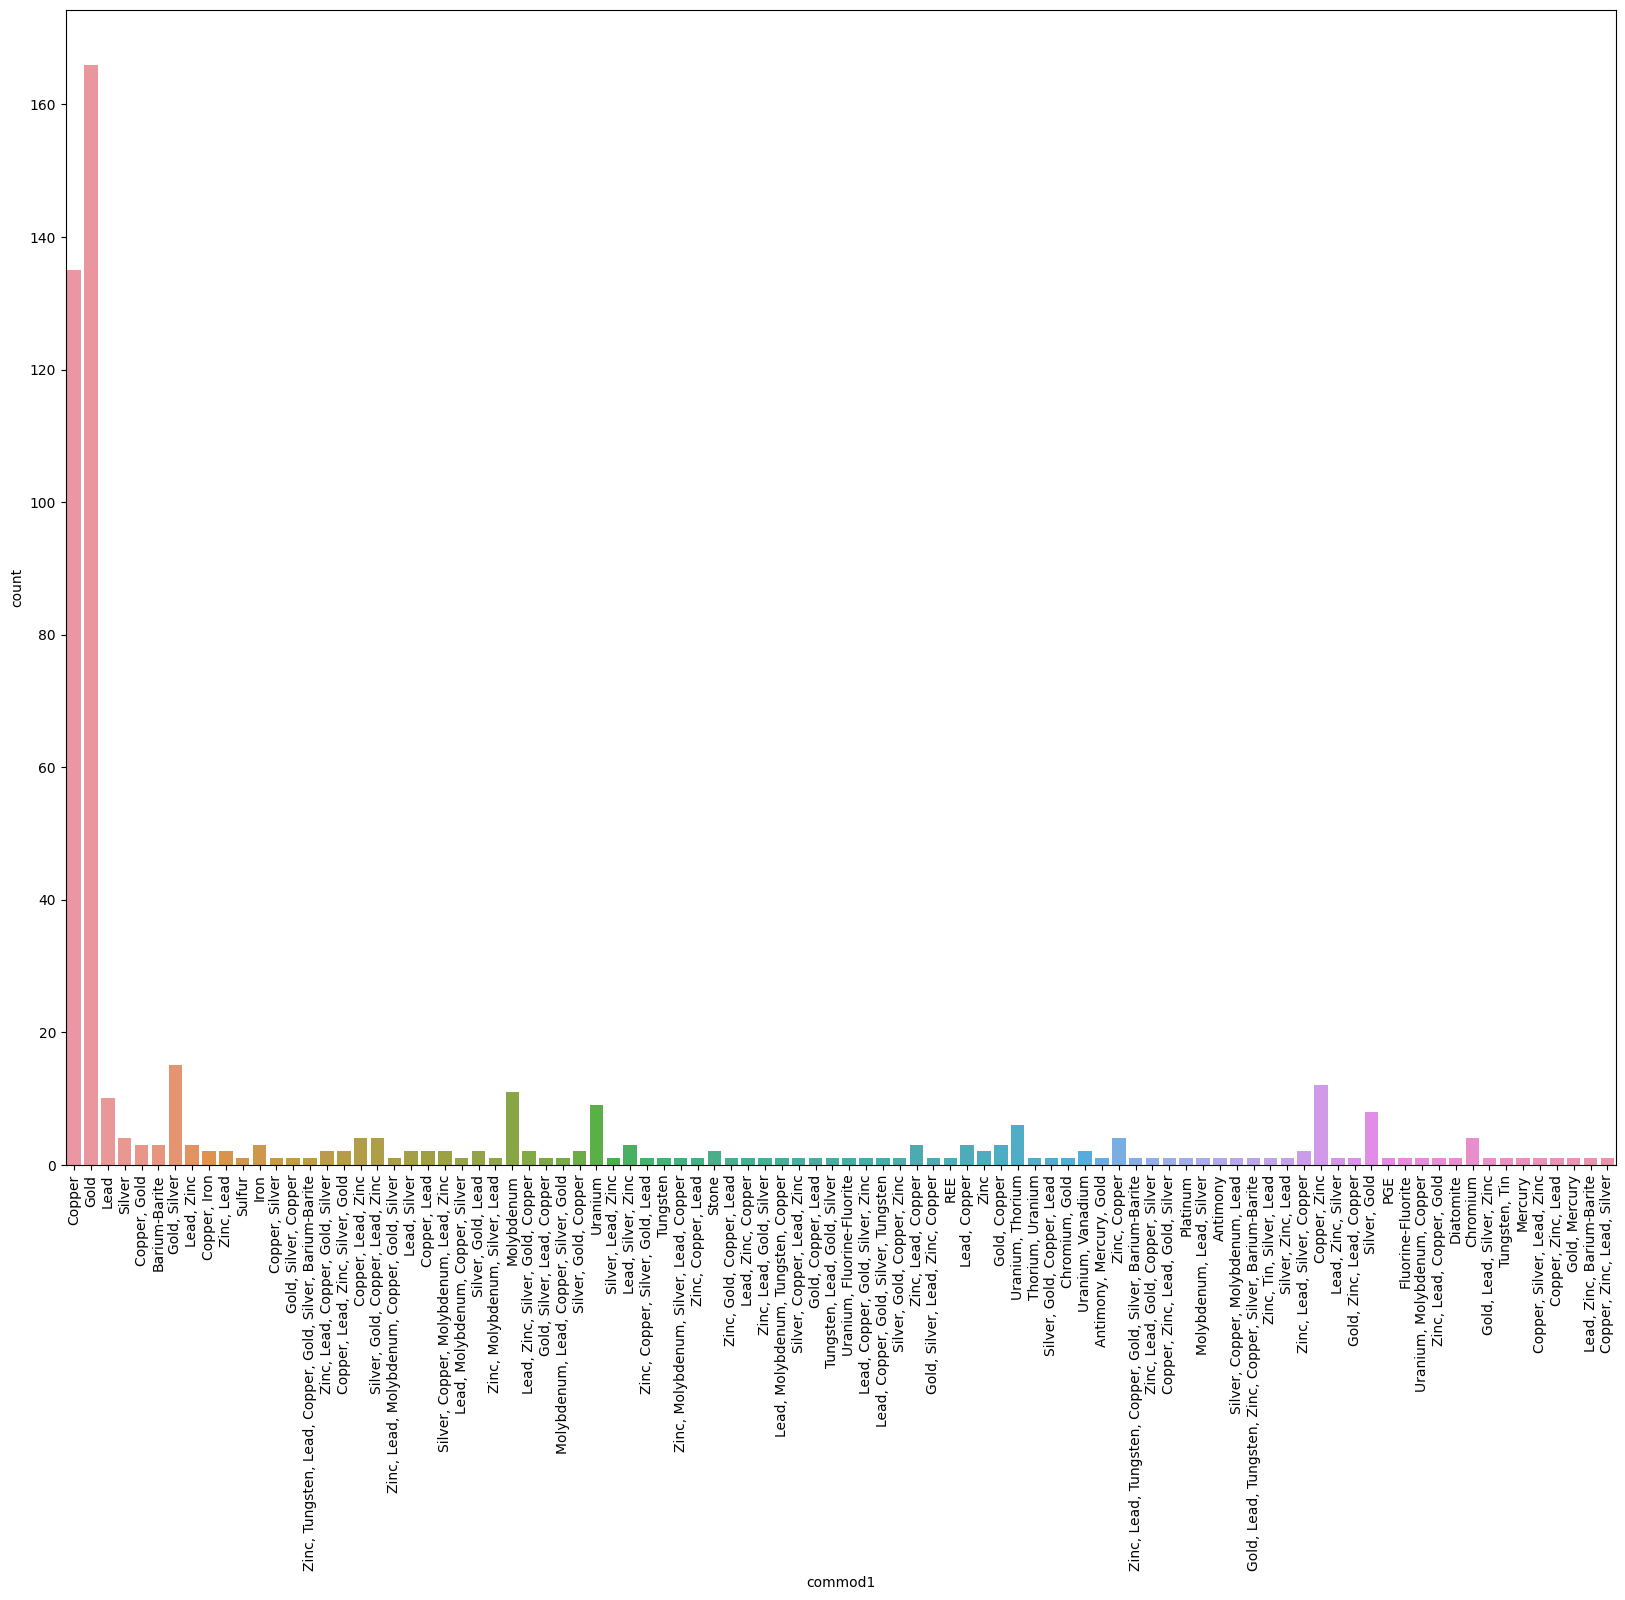

In [20]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['commod1'].head(500))
plt.xticks(rotation=90)
plt.show()

## PRINCIPALES TIPOS DE COMMODITIES SECUNDARIOS

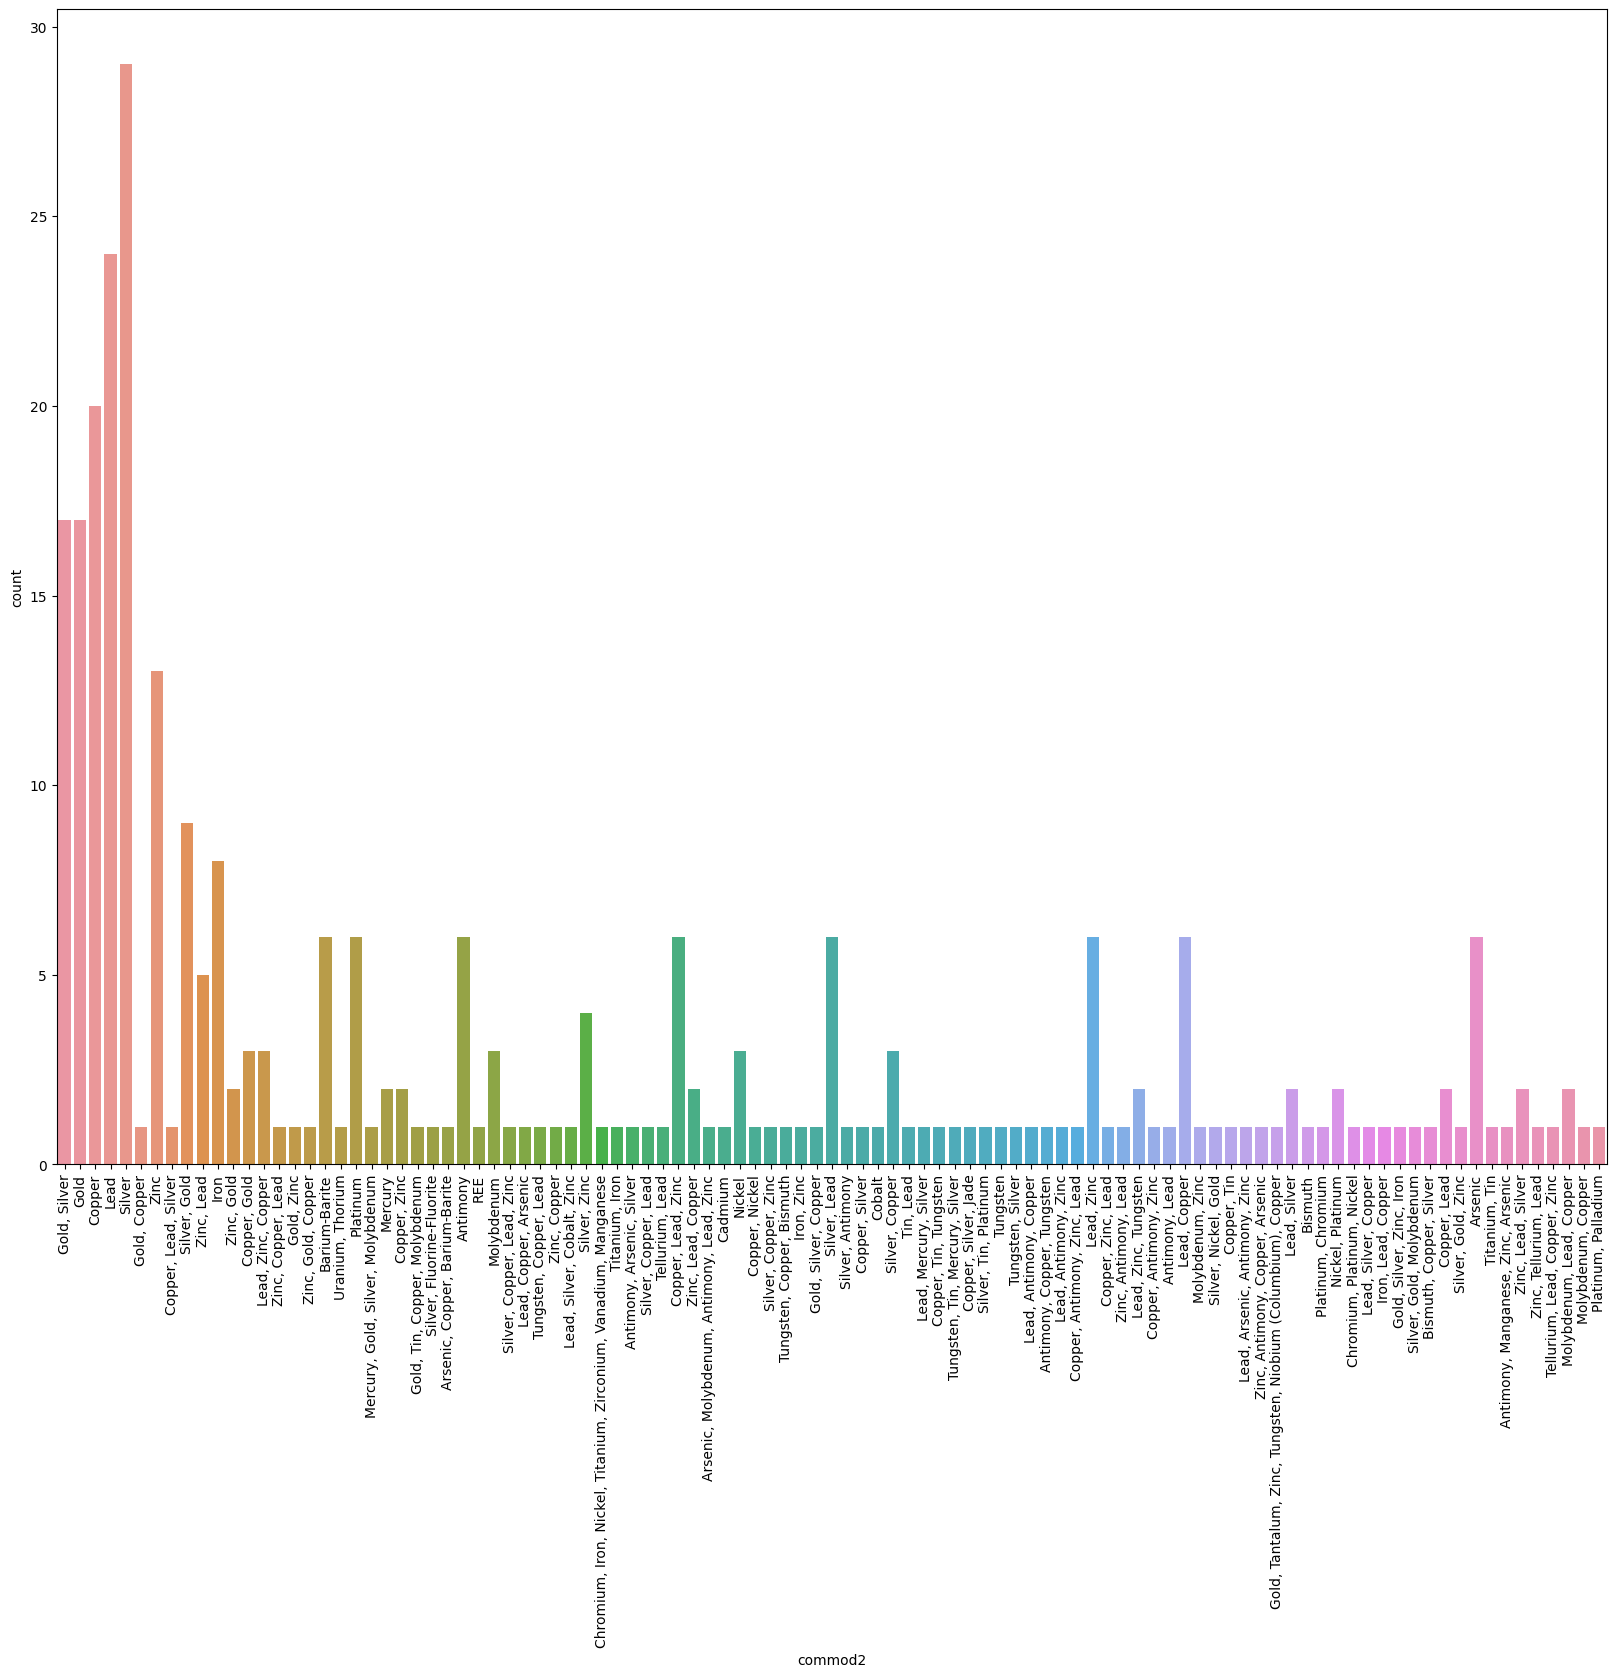

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['commod2'].head(1000))
plt.xticks(rotation=90)
plt.show()

## PRINCIPALES TIPOS DE COMMODITIES TERCIARIOS

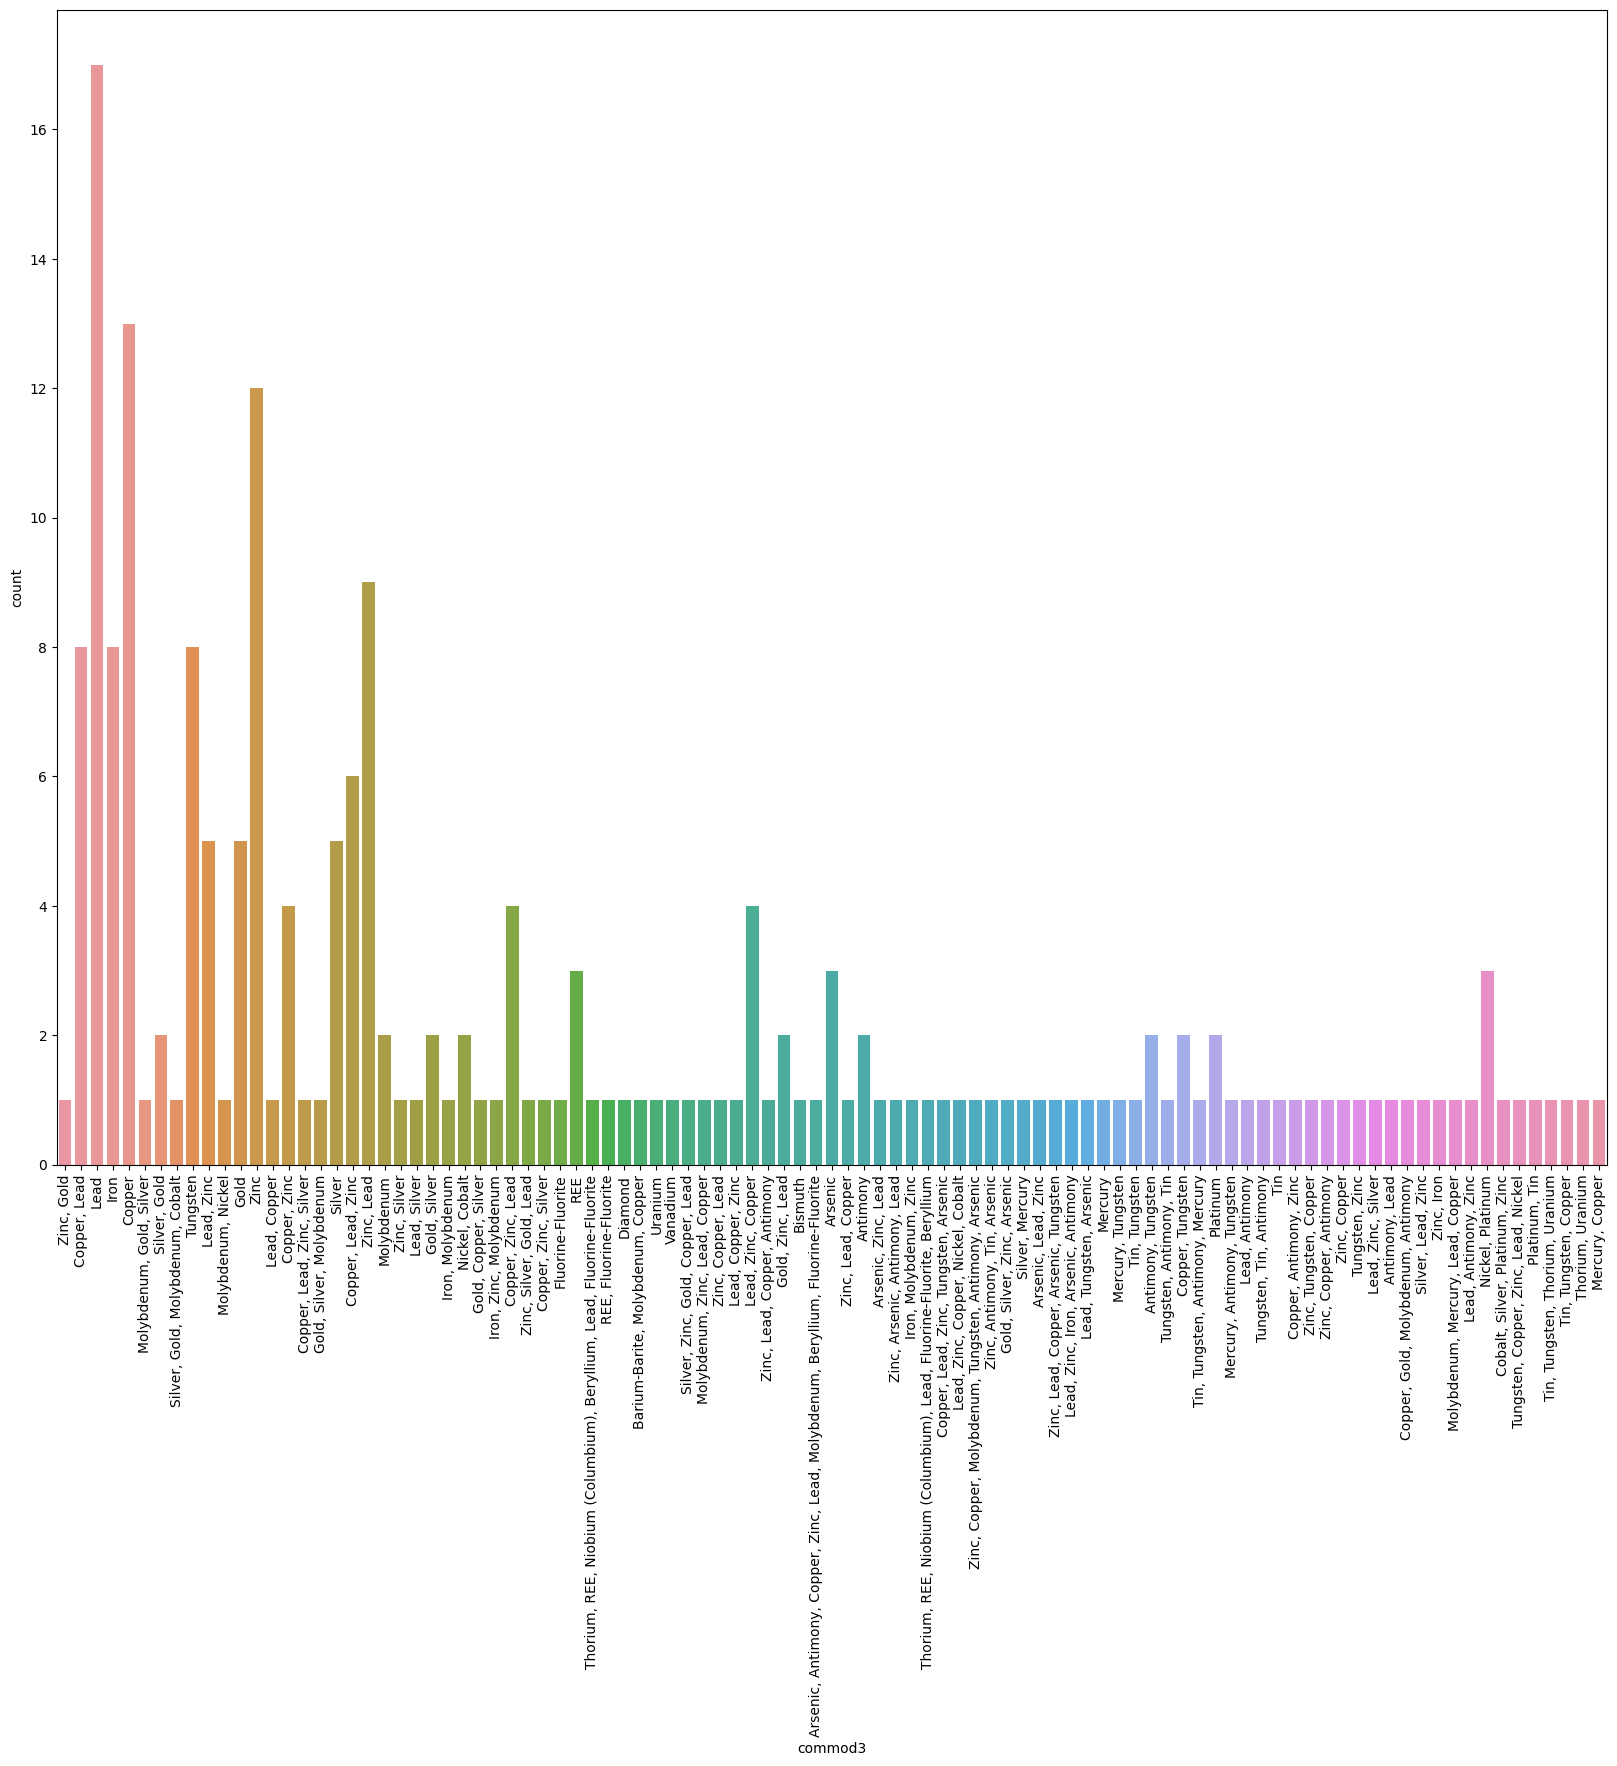

In [22]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['commod3'].head(1000))
plt.xticks(rotation=90)
plt.show()

## FORMA DE APARIENCIA DEL YACIMIENTO

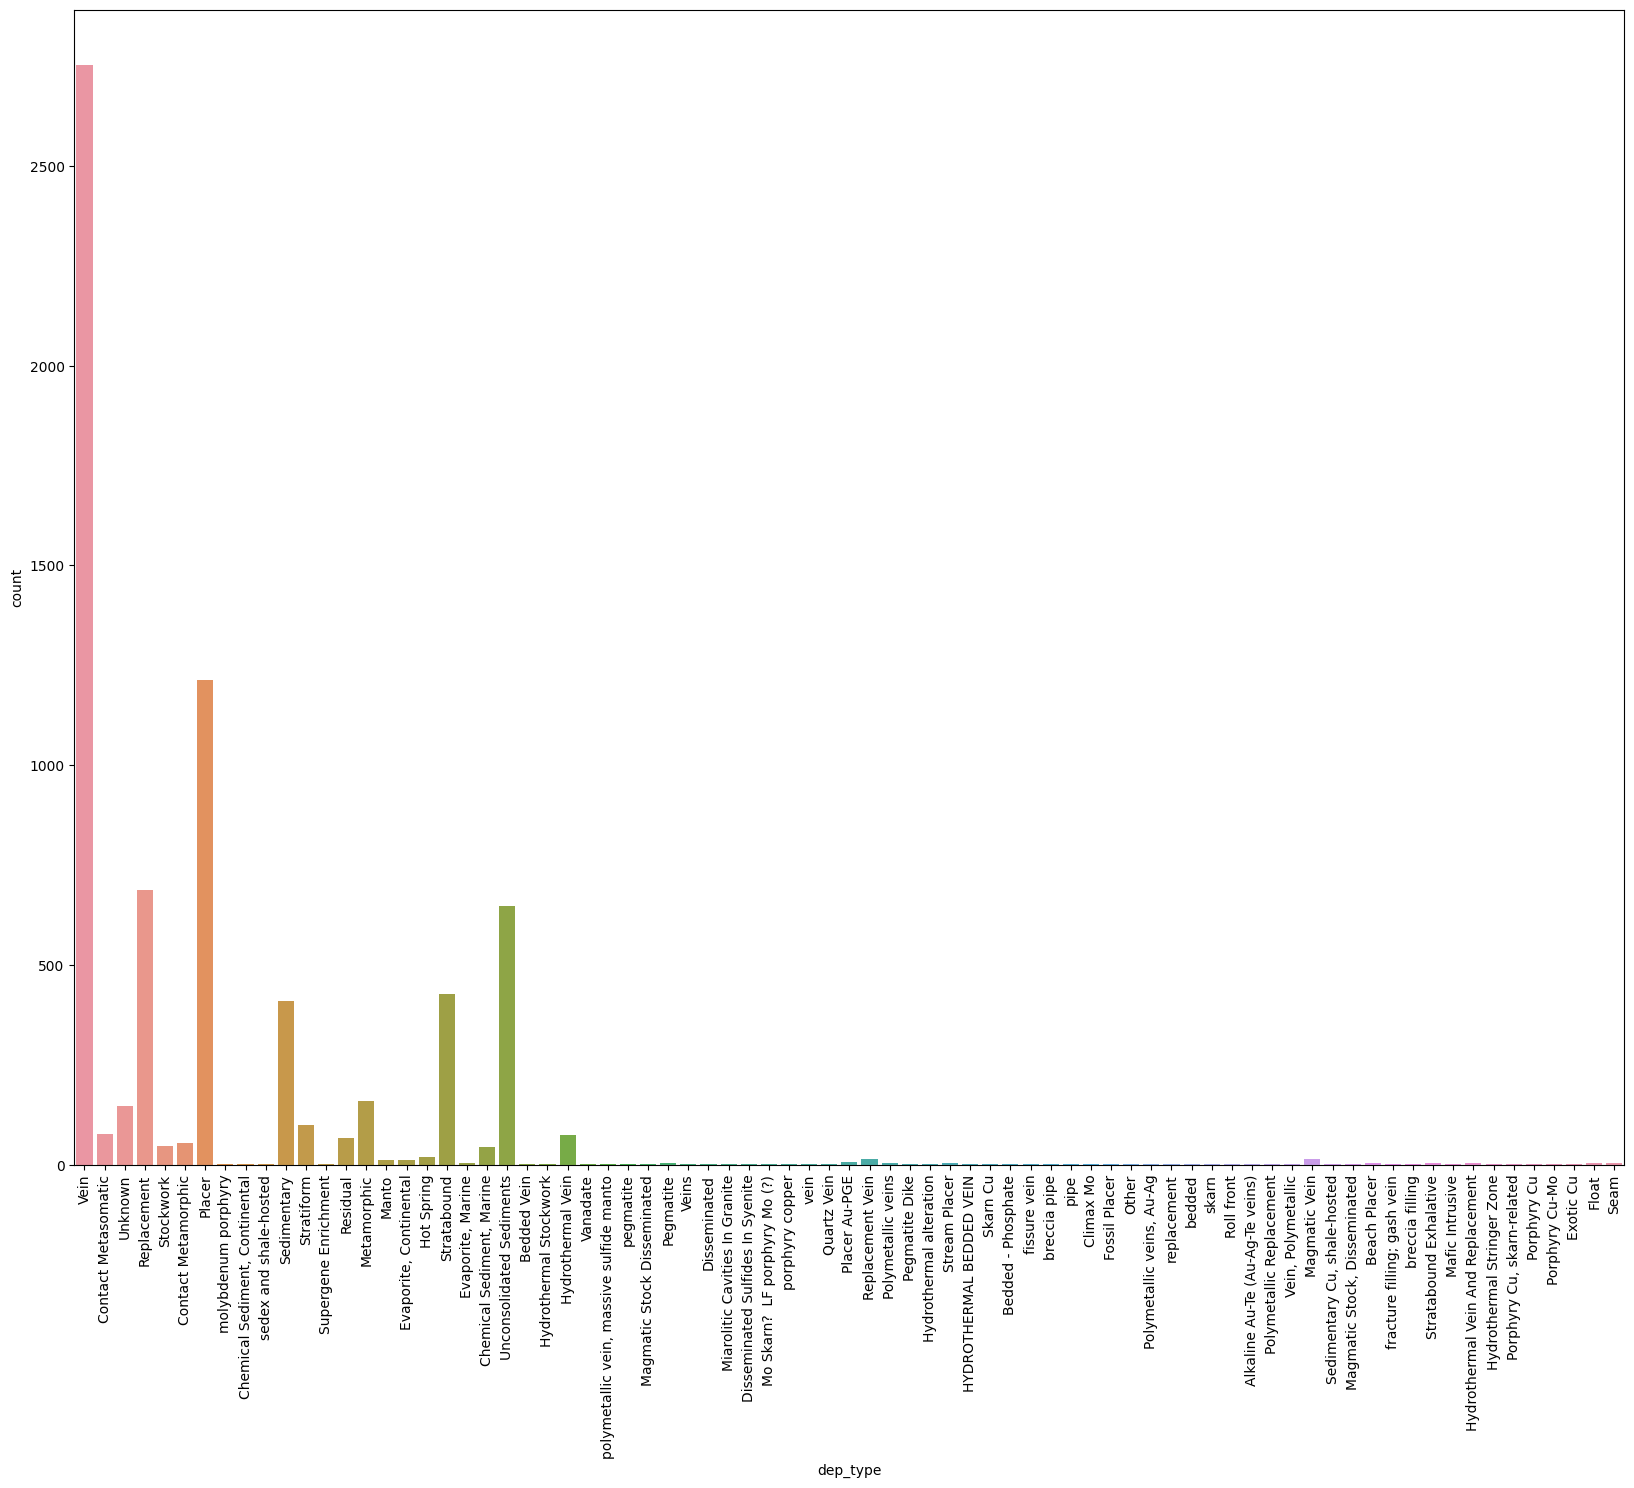

In [23]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['dep_type'].head(30000))
plt.xticks(rotation=90)
plt.show()

## MENA MINERAL

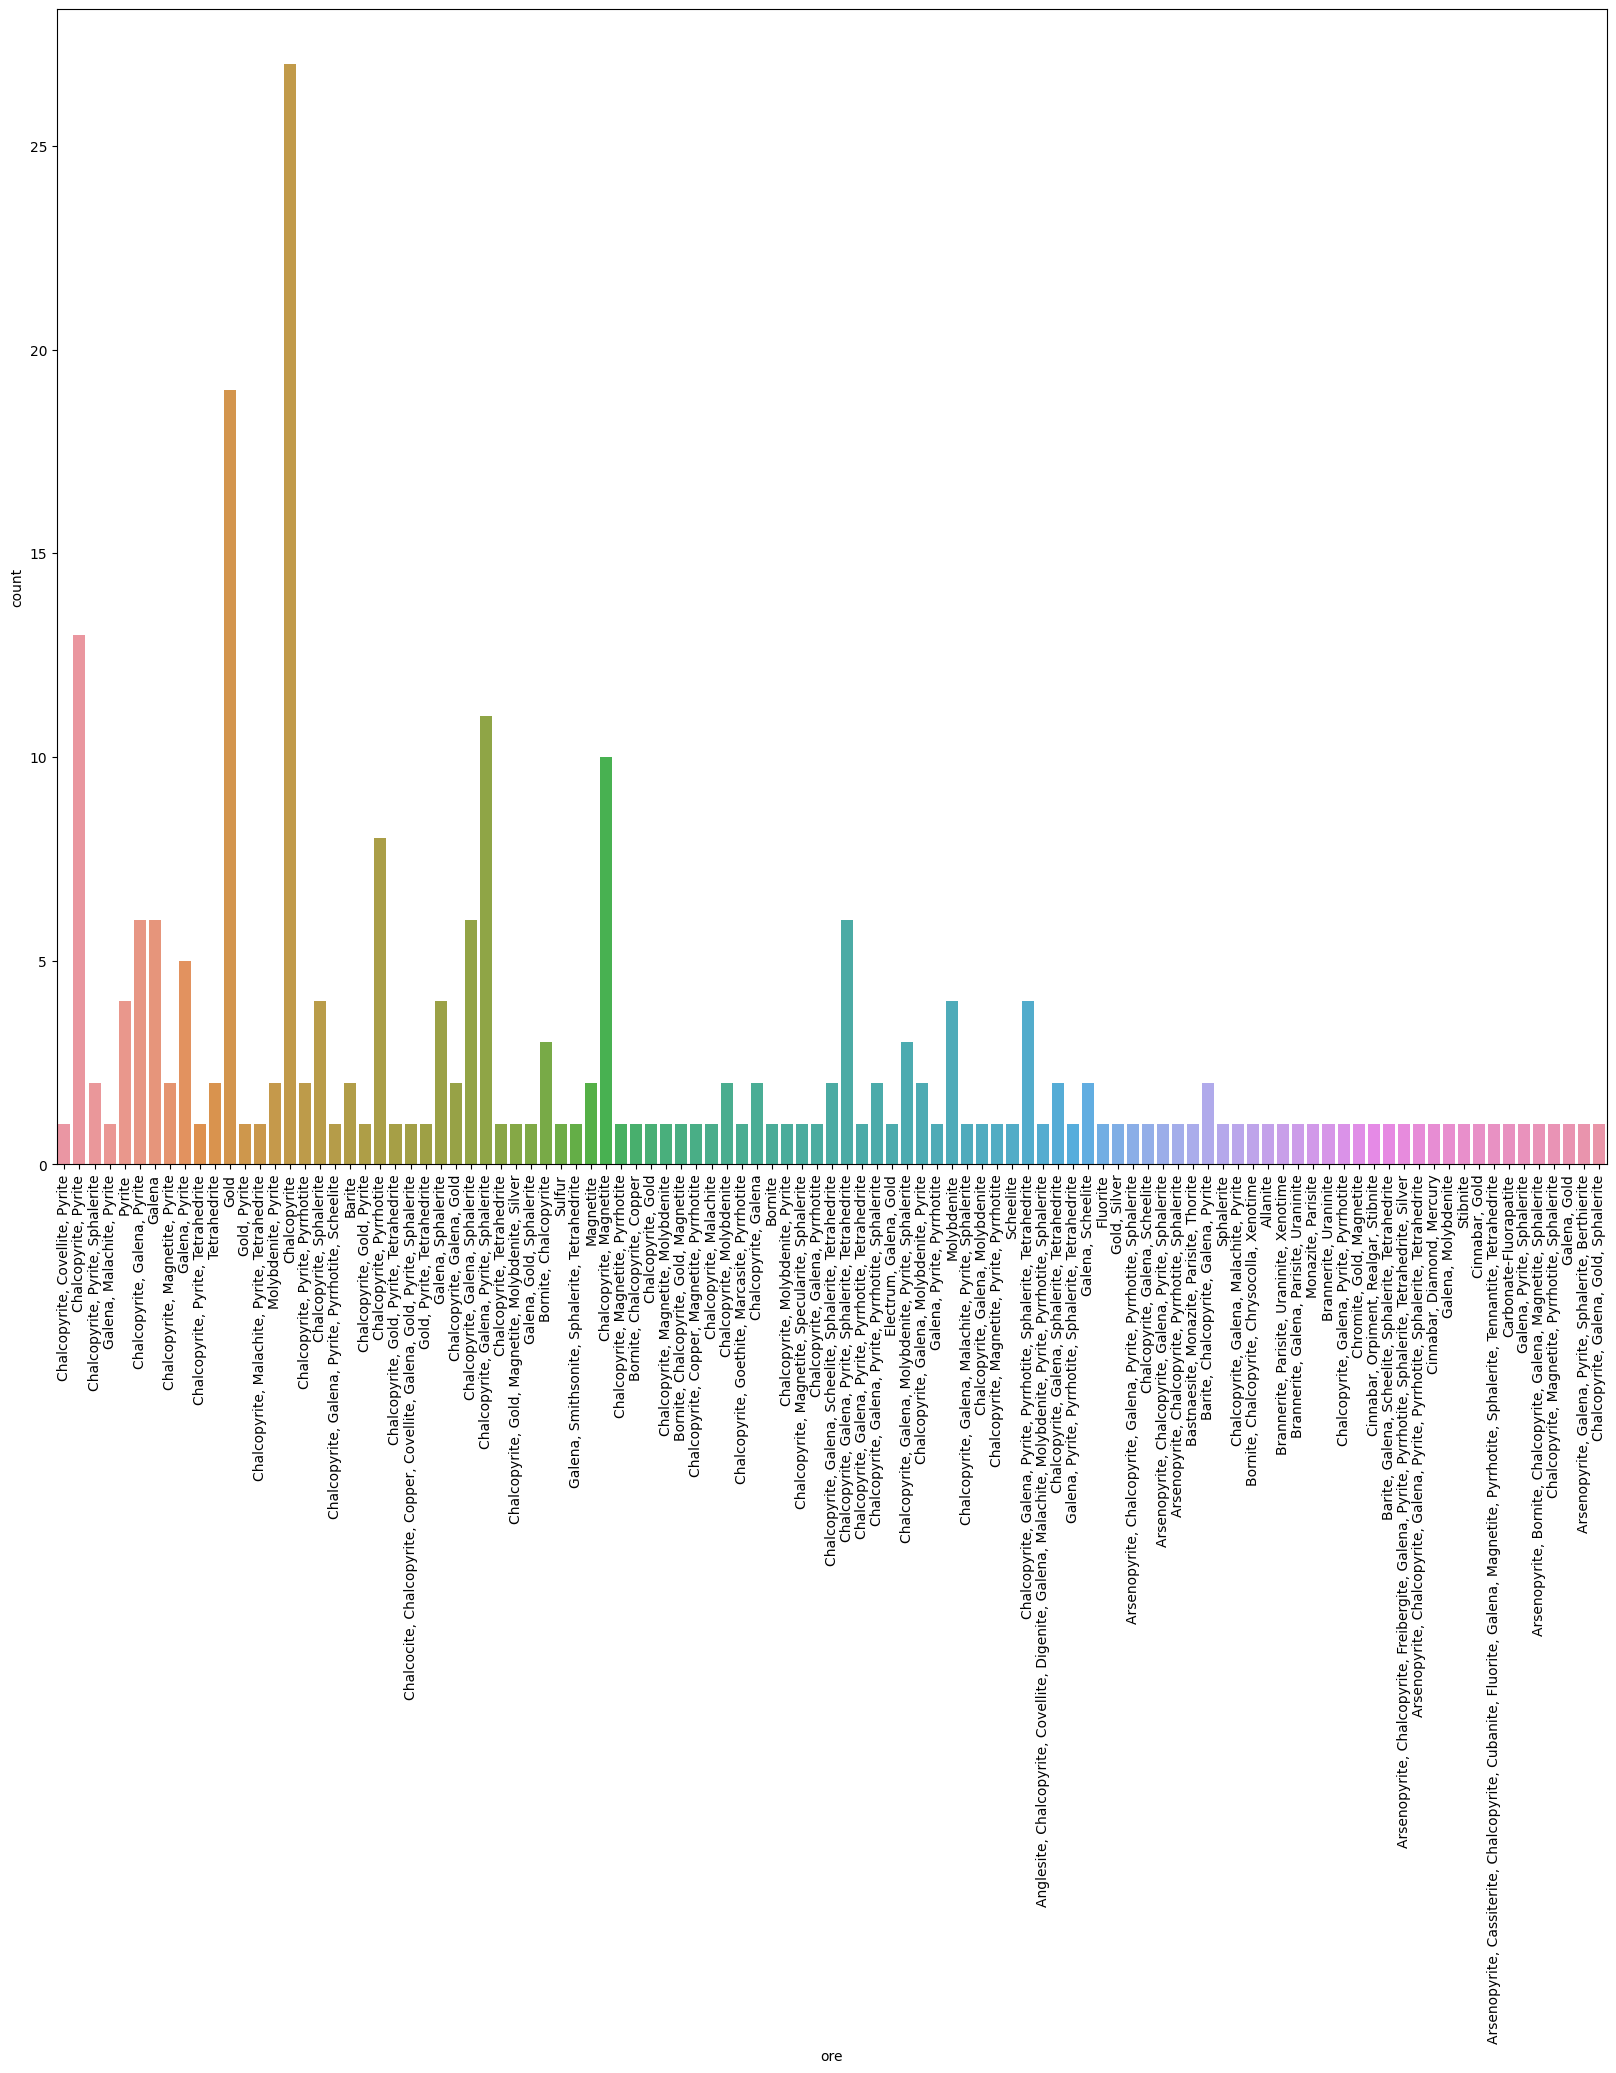

In [24]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['ore'].head(300))
plt.xticks(rotation=90)
plt.show()

## FORMA DE EXTRACCIÓN DEL MINERAL

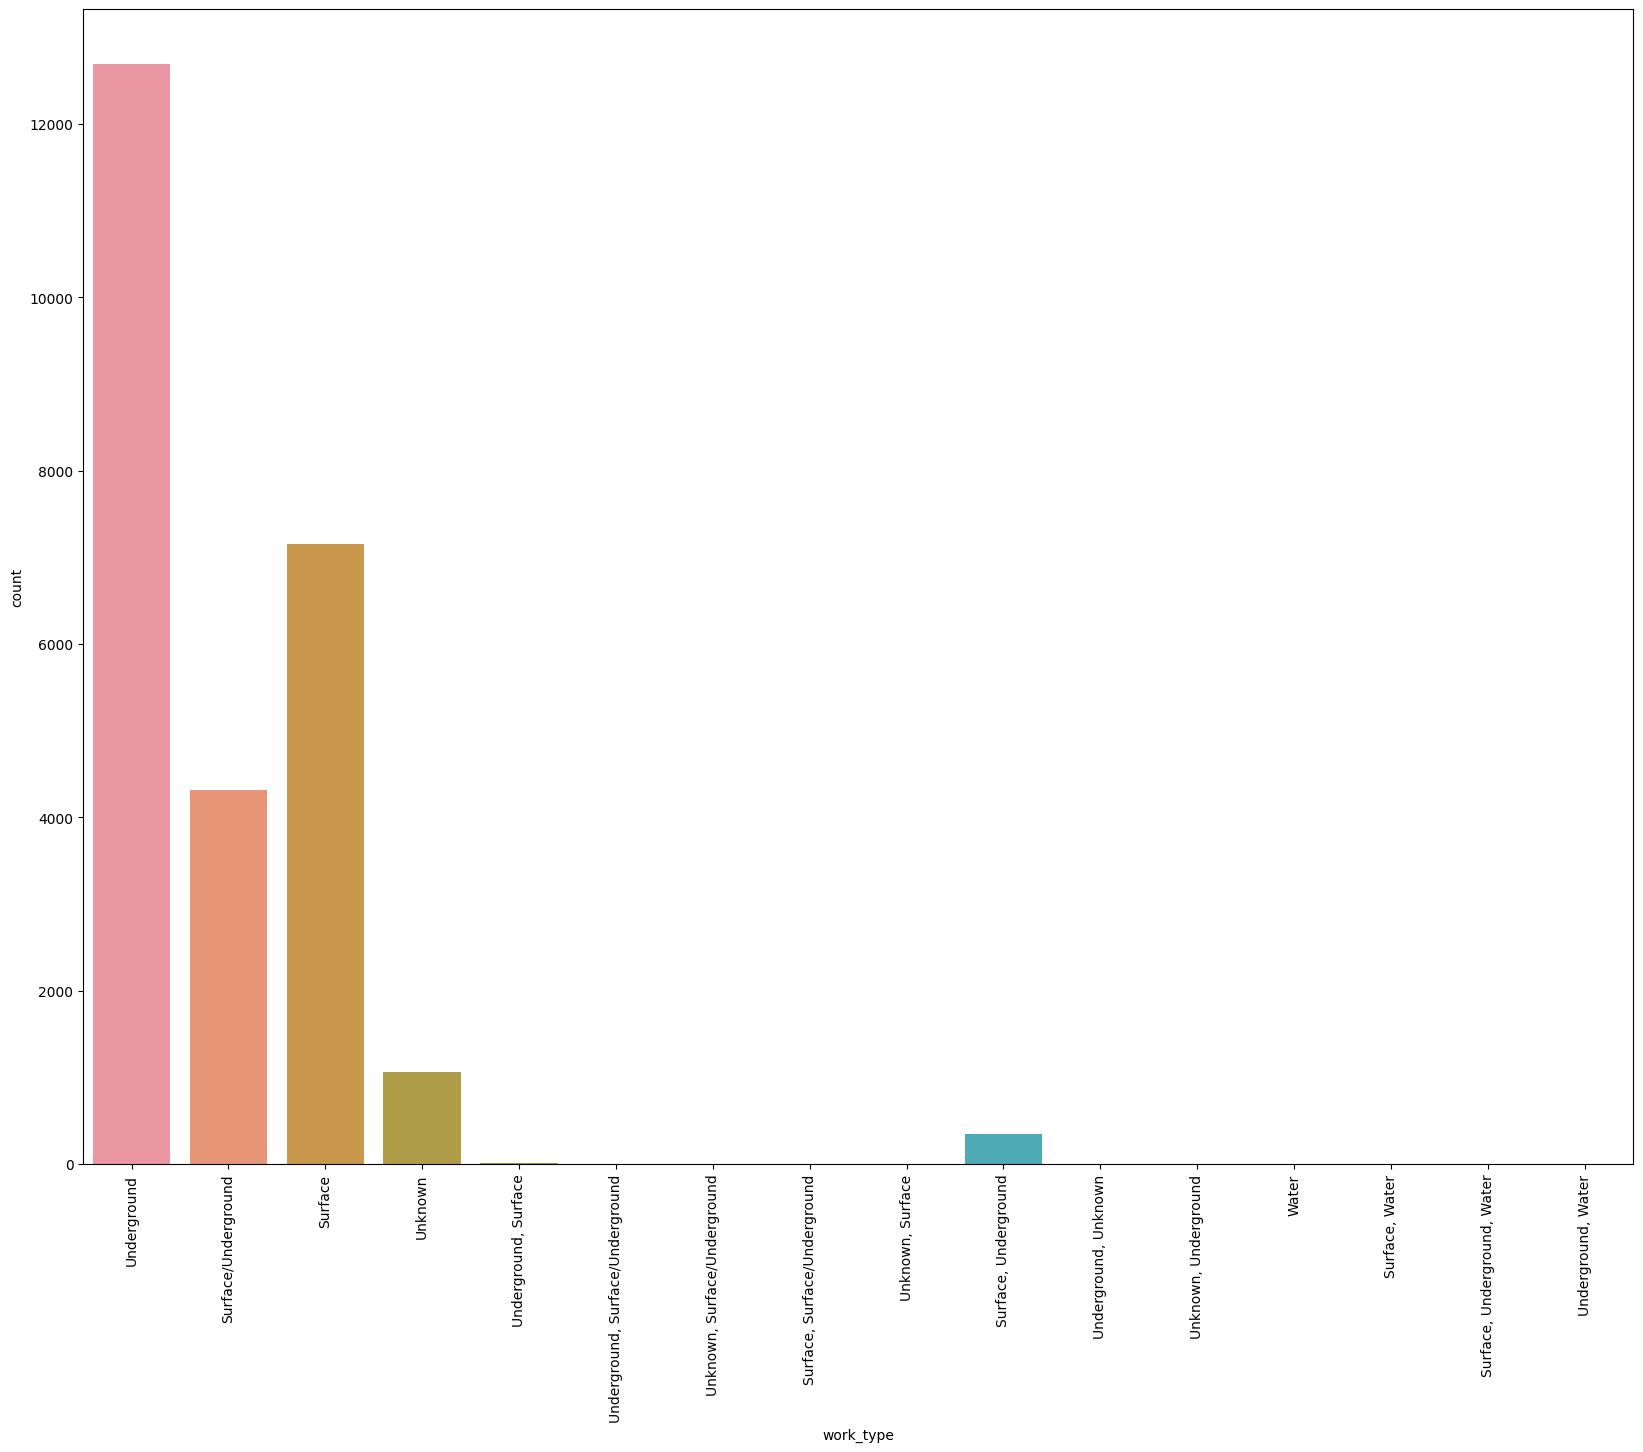

In [26]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['work_type'])
plt.xticks(rotation=90)
plt.show()

### SOBRE EL DATASET

CONTEXTO ANALITICO

    El Dataset con el que se trabajará a continuación corresponde a un conjunto de datos referidos al contenido de minerales del agua en un pueblo llamado Dioncaster, el cual se ubica en el extremo occidental del condado de Sabbatown.
    El archivo .csv utilizado fue descargado de la página kaggle.com.

CONTEXTO COMERCIAL

    El objetivo del presente trabajo es analizar como impacta el contenido de determinados minerales en la calidad de agua, la cual es utilizada tanto para riego de cultivos, como para consumo animal. Por lo cual se pretende discriminar en cuanto a la aptitud del agua, en base al fin con el que se la vaya a utilizar.

DESCRIPCIÓN  

Todos los atributos del dataset listados a continuación están expresados por litro:
- aluminium: aluminio
- arsenic: arsénico
- barium: bario
- cadmium: cadmio
- chloramine: cloramina
- chromium: cromo
- cooper: cobre
- fluoride: fluoruro
- bacteria: bacterias
- viruses: virus
- lead: plomo
- nitrates: nitratos
- nitrites: nitritos
- mercury: mercurio
- perchlorate: perclorato
- radium: radio
- selenium: selenio
- silver: plata
- uranium: uranio
- is_safe: es seguro para consumo



El dataset seleccionado cuenta con 7999 filas y 21 columnas

In [7]:
display(df.shape)


(7999, 21)

El dataset cuenta con los siguientes nombres en sus columnas

In [8]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

Bad pipe message: %s [b'\x06\xaeo4\xc8\x99\xda\xb6\x15\xe2\xeaU\xa0\x9f\x0chS\xa7 x\x0e\x0b\xf4@\xaf\x89X\xf0\x14k\x10\xb8\x9cE\xec/\xa3\xcf\x8a\xa3]1\xae\xfc\xdb\x9e\x11\xe4\xa2\x89c\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01']
Bad pipe message: %s [b'\n']
Bad pipe message: %s [b'\xa5\xdf\x8fI\xef\xc8s\xe04\xb6\x96\xb6\x9b\x90\xa6\xb1\xc6K n]', b'i2A\xcc\x86w\xcfbk}\xc8\xcc=V\xa5+\x1a\x110\x9e\x83\xc0\xcb\xd6\xfd4\xa6\x84\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00']
Bad pipe message: %s [b' 3o\xf4G(e\xf3?\x04q\x0c\xe2\xdf

El dataset cuenta con los siguientes tipos de datos en sus columnas

In [13]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

La información proporcionada es la siguiente:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

### La variable que se busca predecir es la llamada "is_safe" a=is_safe 
### Es decir si el agua es apta para consumo animal.


#### Las variables consideradas relevantes para predecir la aptitud en consumo animal son z1=arsenic z2=fluorides z3=nitrates

#### z1=arsenic y z2=fluorides se ha seleccionado ya que el As y el F por si mismos pueden definir la ineptitud del agua para ser consumida. SOn elementos altamente tóxicos para animales y para el hombre, por lo que independientemente de la composición salina del agua en bebida, altos niveles de uno u otro limitan su uso.
#### z3=nitrates se ha elegido ya que los nitratos se consideran peligrosos a partir de 200 ppm y son indicadores de contaminación orgánica, también se ha encontrado que están muy relacionados a la fertilización irracional con urea.

In [27]:
print (type(df['is_safe']),type(df[['is_safe']]))
display(df['is_safe'].head(20))
display(df[['is_safe']].head(20))


<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


0     1
1     1
2     0
3     1
4     1
5     1
6     0
7     0
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: is_safe, dtype: object

,is_safe
0,1
1,1
2,0
3,1
4,1
5,1
6,0
7,0
8,1
9,1


## DATASET 2: PREDICCIÓN TITULOS SIMILARES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [6]:
pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/netflix_titles.csv')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df = pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/netflix_titles.csv')



In [8]:
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [32]:
df.tail(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [34]:
df.sample(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3768,s3769,Movie,Stree,Amar Kaushik,"Rajkummar Rao, Shraddha Kapoor, Pankaj Tripath...",India,"June 7, 2019",2018,TV-MA,127 min,"Comedies, Horror Movies, Independent Movies","Once a year, men in a small town fear abductio..."
3154,s3155,Movie,Seven and a half dates,Biodun Stephen,"Mercy Johnson, Jim Iyke, Toyin Abraham, Sola S...",NaN,"December 13, 2019",2018,TV-14,107 min,"Dramas, International Movies, Romantic Movies","Engrossed in her career, a young woman relucta..."
7726,s7727,Movie,People You May Know,J.C. Falcón,"Sean Maher, Andrea Grano, Mark Cirillo, Nacho ...","United States, Spain","February 28, 2017",2016,TV-MA,108 min,"Dramas, LGBTQ Movies",The lives of several friends are thrown into c...
6203,s6204,Movie,B.A. Pass,Ajay Bahl,"Shadab Kamal, Shilpa Shukla, Rajesh Sharma, Di...",India,"June 7, 2018",2013,TV-14,99 min,"Dramas, Independent Movies, International Movies","Orphaned and at loose ends, young Mukesh falls..."
489,s490,Movie,Back to Q82,Ahmed Siddiqui,"Jassim Al Nabhan, Abdel Imam Abdullah, Abdulaz...","Kuwait, United States","July 8, 2021",2017,TV-14,104 min,"Comedies, International Movies","Eager to rejoin her divorced parents, an inven..."
7269,s7270,Movie,Last Ferry,Jaki Bradley,"Ramón O. Torres, Sheldon Best, Myles Clohessy,...",United States,"March 11, 2020",2019,TV-MA,86 min,"Dramas, Independent Movies, LGBTQ Movies","Seeking romance and friendship, a young gay la..."
6175,s6176,Movie,Antidote,Ken Barbet,"Randy Couture, Chuck Zito, Wil Traval, Celeste...",United States,"April 14, 2019",2018,TV-MA,90 min,"Action & Adventure, Horror Movies",A tough-as-nails treasure hunter protects a hu...
7427,s7428,Movie,Maynard,Samuel D. Pollard,NaN,United States,"September 2, 2018",2017,TV-PG,100 min,Documentaries,"Friends, family and political titans recall th..."
5131,s5132,Movie,Shikari,"Latif Faiziyev, Umesh Mehra","Mithun Chakraborty, Naseeruddin Shah, Irina Ku...","India, Soviet Union","December 8, 2017",1991,TV-14,163 min,"Dramas, International Movies, Music & Musicals","When Shankar, who performs on the road with pa..."
4993,s4994,Movie,The Outsider,Martin Zandvliet,"Jared Leto, Tadanobu Asano, Kippei Shiina, Shi...",United States,"March 9, 2018",2018,TV-MA,121 min,"Dramas, Thrillers",An American soldier imprisoned in postwar Japa...


#### VALORES FALTANTES DEL DATASET

In [35]:
df.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [36]:
df.fillna(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,0,0,0,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### SOBRE EL DATASET

CONTEXTO ANALITICO

    Netflix es una de las plataformas de transmisión de video y medios mas populares. Posee mas de 8000 películas y programas de TV disponibles en su plataforma, y mas de 200 millones de suscriptores en todo el mundo. Este dataset reune información sobre peliculas y programas de tv disponibles en Netflix.

    El archivo .csv utilizado fue descargado de la página kaggle.com.

CONTEXTO COMERCIAL

    El objetivo del presente trabajo es optimizar el algoritmo de la plataforma, para que las recomendaciones propuestas se ajusten a los deseos de los usuarios.

DESCRIPCIÓN  

Todos los atributos del dataset listados se presentan a continuación:
- show_id: ID unico para cada pelicula/programa de tv
- type: identificador de pelicula/programa de tv
- title: titulo de pelicula/programa de tv
- Director: director de pelicula/programa de tv
- cast: actores involucrados en la pelicula/programa de tv
- date_added: fecha en la cual se agregó a Netflix
- release_year: año de lanzamiento de pelicula/programa de tv
- rating: calificacion de pelicula/programa de tv según edad
- duration: duración total en minutos o numero de temporadas de pelicula/programa de tv
- listed_in: clasificación en base a categoría de pelicula/programa de tv
-description: sinopsis de pelicula/programa de tv



El dataset seleccionado cuenta con 8807 filas y 12 columnas

In [9]:
display(df.shape)

(8807, 12)

El dataset cuenta con los siguientes nombres en sus columnas:

In [38]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

El dataset cuenta con los siguientes tipos de datos en sus columnas:

In [39]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

La información proporcionada es la siguiente:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### La variable que se busca predecir es "Similar Content" x=similar_content 
### Es decir encontrar la manera de que la variable se ajuste a los requerimientos de usuario, basada en características relevantes.


#### Las variables consideradas relevantes para predecir el contenido similar son a1=listed_in a2=rating a3=director

#### a1=listed_in se ha seleccionado ya que se identifica como de suma importancia para precedir un contenido similar, ajustarse a si lo que desea ver el suscriptor va a ser clasificado de la misma manera que lo que lo llevó a ver determinada pelicula o programa de tv 
#### a2=rating se utiliza ya que la categoría de película/programa de tv en base a quién esta apto para ver dicho contenido hace pensar que si el usuario busca contenido similar, no debería salir de dicha categoria. Por otro lado, es importante en caso de menores de edad, que no se recomiende algo no apto para dichi público.
#### a3=director el director suele tener su propia impronta y manera de dirigir el contenido, por lo cual se cree relevante que si a un usuario le gustó determinado contenido, seleccionar el mismo director o alguno similar puede satisfacer los requerimientos.

## DATASET 3: PREDICIÓN DE GANADORES EN TENIS DE MESA

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [11]:
pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/tenisdemesa.csv')

,Unnamed: 0,Date,Player1,Player2,Sets_P1,Sets_P2,P1_G1,P2_G1,P1_G2,P2_G2,P1_G3,P2_G3,P1_G4,P2_G4,P1_G5,P2_G5,HomeWinner
0,1,2022-06-10 01:05:00,Marchuk M.,Polysynskyi M.,3,1,11,8,11,6,6,11,11.0,8.0,NaN,NaN,1
1,2,2022-06-10 01:25:00,Sokolov S.,Sachuk S.,0,3,12,14,8,11,5,11,NaN,NaN,NaN,NaN,0
2,3,2022-06-10 01:35:00,Samofal Y.,Bambutsa R.,3,1,4,11,11,5,11,6,11.0,9.0,NaN,NaN,1
3,4,2022-06-10 01:55:00,Kyilo V.,Chernyshov D.,3,1,6,11,11,1,15,13,11.0,7.0,NaN,NaN,1
4,5,2022-06-10 02:05:00,Polysynskyi M.,Kostiuk B.,3,0,12,10,11,9,11,6,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,7847,2022-07-08 13:50:00,Rehak M.,Bazany D.,3,2,4,11,11,9,4,11,11.0,5.0,11.0,7.0,1
7847,7848,2022-07-08 13:55:00,Bielokon Y.,Yushko R.,3,2,11,6,11,8,8,11,10.0,12.0,11.0,3.0,1
7848,7849,2022-07-08 13:55:00,Kuzmych V.,Rak S.,2,3,11,9,3,11,13,11,8.0,11.0,5.0,11.0,0
7849,7850,2022-07-08 14:00:00,Bondarenko I.,Havryliuk B.,0,3,10,12,8,11,4,11,NaN,NaN,NaN,NaN,0


In [12]:
df = pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/tenisdemesa.csv')

In [43]:
df.head(20)

,Unnamed: 0,Date,Player1,Player2,Sets_P1,Sets_P2,P1_G1,P2_G1,P1_G2,P2_G2,P1_G3,P2_G3,P1_G4,P2_G4,P1_G5,P2_G5,HomeWinner
0,1,2022-06-10 01:05:00,Marchuk M.,Polysynskyi M.,3,1,11,8,11,6,6,11,11.0,8.0,NaN,NaN,1
1,2,2022-06-10 01:25:00,Sokolov S.,Sachuk S.,0,3,12,14,8,11,5,11,NaN,NaN,NaN,NaN,0
2,3,2022-06-10 01:35:00,Samofal Y.,Bambutsa R.,3,1,4,11,11,5,11,6,11.0,9.0,NaN,NaN,1
3,4,2022-06-10 01:55:00,Kyilo V.,Chernyshov D.,3,1,6,11,11,1,15,13,11.0,7.0,NaN,NaN,1
4,5,2022-06-10 02:05:00,Polysynskyi M.,Kostiuk B.,3,0,12,10,11,9,11,6,NaN,NaN,NaN,NaN,1
5,6,2022-06-10 02:30:00,Sachuk S.,Diachenko M.,2,3,11,9,11,9,5,11,10.0,12.0,0.0,11.0,0
6,7,2022-06-10 02:35:00,Balakiriev M.,Marchuk M.,3,1,11,8,11,7,3,11,11.0,9.0,NaN,NaN,1
7,8,2022-06-10 02:55:00,Hryshchenko O.,Sokolov S.,3,2,11,8,7,11,11,3,9.0,11.0,11.0,9.0,1
8,9,2022-06-10 03:05:00,Samofal Y.,Polysynskyi M.,0,3,9,11,9,11,8,11,NaN,NaN,NaN,NaN,0
9,10,2022-06-10 03:25:00,Kyilo V.,Sachuk S.,2,3,9,11,5,11,11,7,11.0,6.0,9.0,11.0,0


In [44]:
df.tail(20)

,Unnamed: 0,Date,Player1,Player2,Sets_P1,Sets_P2,P1_G1,P2_G1,P1_G2,P2_G2,P1_G3,P2_G3,P1_G4,P2_G4,P1_G5,P2_G5,HomeWinner
7831,7832,2022-07-08 13:10:00,Chornobab V.,Honchar Y.,1,3,7,11,12,10,7,11,9.0,11.0,NaN,NaN,0
7832,7833,2022-07-08 13:15:00,Blazek J.,Barsa T.,1,3,11,4,6,11,2,11,4.0,11.0,NaN,NaN,0
7833,7834,2022-07-08 13:20:00,Lenart R.,Cechvala R.,3,1,3,11,11,9,11,7,12.0,10.0,NaN,NaN,1
7834,7835,2022-07-08 13:20:00,Lutskyi V.,Maltsev D.,1,3,6,11,11,3,6,11,9.0,11.0,NaN,NaN,0
7835,7836,2022-07-08 13:20:00,Zotov Y.,Plamadeala D.,0,3,9,11,7,11,3,11,NaN,NaN,NaN,NaN,0
7836,7837,2022-07-08 13:25:00,Nemtsov S.,Torba R.,1,3,9,11,11,7,6,11,5.0,11.0,NaN,NaN,0
7837,7838,2022-07-08 13:25:00,Peretiatko A.,Husiev V.,3,1,14,12,11,6,7,11,11.0,7.0,NaN,NaN,1
7838,7839,2022-07-08 13:30:00,Miroshnychenko S.,Tupyk M.,1,3,11,4,4,11,7,11,8.0,11.0,NaN,NaN,0
7839,7840,2022-07-08 13:30:00,Seluchenko O.,Vasylyshyn I.,3,0,12,10,11,9,11,7,NaN,NaN,NaN,NaN,1
7840,7841,2022-07-08 13:35:00,Bryzhevatyi O.,Kunchurov D.,0,3,7,11,8,11,12,14,NaN,NaN,NaN,NaN,0


In [45]:
df.sample(20)


,Unnamed: 0,Date,Player1,Player2,Sets_P1,Sets_P2,P1_G1,P2_G1,P1_G2,P2_G2,P1_G3,P2_G3,P1_G4,P2_G4,P1_G5,P2_G5,HomeWinner
7168,7169,2022-07-06 09:55:00,Pyrtyk B.,Nikolenko A.,1,3,11,5,3,11,8,11,9.0,11.0,NaN,NaN,0
1,2,2022-06-10 01:25:00,Sokolov S.,Sachuk S.,0,3,12,14,8,11,5,11,NaN,NaN,NaN,NaN,0
7381,7382,2022-07-06 22:55:00,Chepurnyi A.,Hrymovskyi O.,0,3,9,11,7,11,6,11,NaN,NaN,NaN,NaN,0
1483,1484,2022-06-15 10:20:00,Gogora M.,Bucko P.,0,3,8,11,8,11,3,11,NaN,NaN,NaN,NaN,0
6130,6131,2022-07-02 12:40:00,Ziakun V.,Kolomiiets V.,3,1,12,10,13,15,11,9,11.0,9.0,NaN,NaN,1
3116,3117,2022-06-21 09:20:00,Veternik P.,Papirnik O.,3,0,13,11,11,8,11,5,NaN,NaN,NaN,NaN,1
4013,4014,2022-06-24 10:00:00,Yakimenko S.,Stukalov V.,1,3,11,6,9,11,6,11,6.0,11.0,NaN,NaN,0
601,602,2022-06-12 09:20:00,Dobrzhinsky O.,Shkepu S.,2,3,7,11,11,7,5,11,11.0,6.0,9.0,11.0,0
4460,4461,2022-06-25 20:55:00,Pavlyuk O.,Kravets Y.,1,3,10,12,11,3,9,11,9.0,11.0,NaN,NaN,0
758,759,2022-06-12 18:25:00,Tkachov S.,Babenko P.,1,3,6,11,9,11,13,11,7.0,11.0,NaN,NaN,0


#### VALORES FALTANTES DEL DATASET

In [46]:
df.dropna()

,Unnamed: 0,Date,Player1,Player2,Sets_P1,Sets_P2,P1_G1,P2_G1,P1_G2,P2_G2,P1_G3,P2_G3,P1_G4,P2_G4,P1_G5,P2_G5,HomeWinner
5,6,2022-06-10 02:30:00,Sachuk S.,Diachenko M.,2,3,11,9,11,9,5,11,10.0,12.0,0.0,11.0,0
7,8,2022-06-10 02:55:00,Hryshchenko O.,Sokolov S.,3,2,11,8,7,11,11,3,9.0,11.0,11.0,9.0,1
9,10,2022-06-10 03:25:00,Kyilo V.,Sachuk S.,2,3,9,11,5,11,11,7,11.0,6.0,9.0,11.0,0
11,12,2022-06-10 03:55:00,Sokolov S.,Chernyshov D.,3,2,11,7,12,10,5,11,6.0,11.0,11.0,9.0,1
12,13,2022-06-10 04:05:00,Balakiriev M.,Kostiuk B.,3,2,11,5,13,11,7,11,8.0,11.0,11.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,7843,2022-07-08 13:40:00,Yurchenko K.,Zholubak R.,2,3,11,9,7,11,11,6,7.0,11.0,12.0,14.0,0
7846,7847,2022-07-08 13:50:00,Rehak M.,Bazany D.,3,2,4,11,11,9,4,11,11.0,5.0,11.0,7.0,1
7847,7848,2022-07-08 13:55:00,Bielokon Y.,Yushko R.,3,2,11,6,11,8,8,11,10.0,12.0,11.0,3.0,1
7848,7849,2022-07-08 13:55:00,Kuzmych V.,Rak S.,2,3,11,9,3,11,13,11,8.0,11.0,5.0,11.0,0


In [47]:
df.fillna(0)


,Unnamed: 0,Date,Player1,Player2,Sets_P1,Sets_P2,P1_G1,P2_G1,P1_G2,P2_G2,P1_G3,P2_G3,P1_G4,P2_G4,P1_G5,P2_G5,HomeWinner
0,1,2022-06-10 01:05:00,Marchuk M.,Polysynskyi M.,3,1,11,8,11,6,6,11,11.0,8.0,0.0,0.0,1
1,2,2022-06-10 01:25:00,Sokolov S.,Sachuk S.,0,3,12,14,8,11,5,11,0.0,0.0,0.0,0.0,0
2,3,2022-06-10 01:35:00,Samofal Y.,Bambutsa R.,3,1,4,11,11,5,11,6,11.0,9.0,0.0,0.0,1
3,4,2022-06-10 01:55:00,Kyilo V.,Chernyshov D.,3,1,6,11,11,1,15,13,11.0,7.0,0.0,0.0,1
4,5,2022-06-10 02:05:00,Polysynskyi M.,Kostiuk B.,3,0,12,10,11,9,11,6,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,7847,2022-07-08 13:50:00,Rehak M.,Bazany D.,3,2,4,11,11,9,4,11,11.0,5.0,11.0,7.0,1
7847,7848,2022-07-08 13:55:00,Bielokon Y.,Yushko R.,3,2,11,6,11,8,8,11,10.0,12.0,11.0,3.0,1
7848,7849,2022-07-08 13:55:00,Kuzmych V.,Rak S.,2,3,11,9,3,11,13,11,8.0,11.0,5.0,11.0,0
7849,7850,2022-07-08 14:00:00,Bondarenko I.,Havryliuk B.,0,3,10,12,8,11,4,11,0.0,0.0,0.0,0.0,0


### SOBRE EL DATASET

CONTEXTO ANALITICO

El Dataset con el que se trabajará a continuación corresponde a un conjunto de datos referidos a la recopilación de partidos de Tenis de mesa durante 1 mes. Cada fila representa 1 partido jugado al mejor de 5 sets. Cada set es jugado a 11 puntos, o cuando se cumple una diferencia de 2 puntos.
El archivo .csv utilizado fue descargado de la página kaggle.com.

CONTEXTO COMERCIAL

El objetivo del presente trabajo es intentar predecir la duración del partido, mediante el uso de diferentes variables, las cuales se consideran con mayor preponderancia a la hora de determinar cuanto se extenderán los partidos.

DESCRIPCIÓN

Todos los atributos del dataset son listados a continuación:
- #: Número de partido (ordenado cronológicamente)
- Player1: Nombre del primer jugador
- Player2: Nombre del segundo jugador
- Sets_P1: número de sets ganados por el primer jugador
- Sets_P2: número de sets ganados por el segundo jugador
- P1_G1: número de puntos ganados por el primer jugador en el primer set
- P2_G1: número de puntos ganados por el segundo jugador en el primer set
- P1_G2: número de puntos ganados por el primer jugador en el segundo set
- P2_G2: número de puntos ganados por el segundo jugador en el segundo set
- P1_G3: número de puntos ganados por el primer jugador en el tercer set
- P2_G3: número de puntos ganados por el segundo jugador en el tercer set
- P1_G4: número de puntos ganados por el primer jugador en el cuarto set (NA significa que no se jugó el cuarto set)
- P2_G4: número de puntos ganados por el segundo jugador en el cuarto set (NA significa que no se jugó el cuarto set)
- P1_G5: número de puntos ganados por el primer jugador en el quinto set (NA significa que no se jugó el quinto set)
- P2_G5: número de puntos ganados por el segundo jugador en el quinto set (NA significa que no se jugó el quinto set)
- HomeWinner: ganador (1 significa que ganó el Jugador 1, 0 significa que ganó el Jugador 2)

El dataset seleccionado cuenta con 7851 filas y 17 columnas

In [14]:
display(df.shape)

(7851, 17)

El dataset cuenta con los siguientes nombres en sus columnas:

In [15]:
df.columns

Index(['Unnamed: 0', 'Date', 'Player1', 'Player2', 'Sets_P1', 'Sets_P2',
       'P1_G1', 'P2_G1', 'P1_G2', 'P2_G2', 'P1_G3', 'P2_G3', 'P1_G4', 'P2_G4',
       'P1_G5', 'P2_G5', 'HomeWinner'],
      dtype='object')

El dataset cuenta con los siguientes tipos de datos en sus columnas:

In [17]:
df.dtypes

Unnamed: 0      int64
Date           object
Player1        object
Player2        object
Sets_P1         int64
Sets_P2         int64
P1_G1           int64
P2_G1           int64
P1_G2           int64
P2_G2           int64
P1_G3           int64
P2_G3           int64
P1_G4         float64
P2_G4         float64
P1_G5         float64
P2_G5         float64
HomeWinner      int64
dtype: object

La información proporcionada es la siguiente:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7851 entries, 0 to 7850
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7851 non-null   int64  
 1   Date        7851 non-null   object 
 2   Player1     7851 non-null   object 
 3   Player2     7851 non-null   object 
 4   Sets_P1     7851 non-null   int64  
 5   Sets_P2     7851 non-null   int64  
 6   P1_G1       7851 non-null   int64  
 7   P2_G1       7851 non-null   int64  
 8   P1_G2       7851 non-null   int64  
 9   P2_G2       7851 non-null   int64  
 10  P1_G3       7851 non-null   int64  
 11  P2_G3       7851 non-null   int64  
 12  P1_G4       5448 non-null   float64
 13  P2_G4       5448 non-null   float64
 14  P1_G5       2518 non-null   float64
 15  P2_G5       2518 non-null   float64
 16  HomeWinner  7851 non-null   int64  
dtypes: float64(4), int64(10), object(3)
memory usage: 1.0+ MB


La variable que se busca predecir es la llamada "Ganador del Partido" a=HomeWinner

Las variables consideradas relevantes para predecir la duración del partido son:
 - a1=Sets_P1: corrrespondiente al número de sets ganados por el primer jugador. Es la variable más relevante a la hora de la evaluación, siendo que si este valor supera los 2 sets se considera ganador del partido.
 - a2=P1_G4: número de puntos ganados por el primer jugador en el cuarto set. Se ha estudiado que la manera en la que se juega el 4to set, y consecuentemente los puntos ganados en el mismo, son un factor clave a la hora de evaluar la manera de afrontar el set definitivo en caso de quedar el marcador igualado.
 - a3=1_G5: número de puntos ganados por el primer jugador en el quinto set. Es determinante ya que es el set decisivo, pero puede no ser siempre una opcion a evaluar, en caso de que no se llegue a esa instancia.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl

In [7]:
pd.read_csv('/workspaces/CoderHouse_CH-32845/data/raw/waterquality.csv')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [6]:
mpl.style.use('bmh')

NameError: name 'mpl' is not defined

## hola

# hola

**hola**

*hola*

- fgdfgdfg
- sdfsdf

* zxczxc
* zxczxc

1. asdasds
    asdasd

[link a youtube](https://youtube.com)

---

$2+2 = 4$

voy a colocar una formula $$2+2 =4$$